In [172]:
from sklearn.datasets import make_circles

n_samples = 1000

X, Y = make_circles(n_samples= n_samples, noise=0.03, random_state=42)

In [173]:
len(X), len(Y)

(1000, 1000)

In [174]:
X[:5], Y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [175]:
import pandas as pd
circles_df = pd.DataFrame({"X1": X[:, 0], "X2" : X[:,1], "Y":Y[:]})
circles_df[:10]

,X1,X2,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


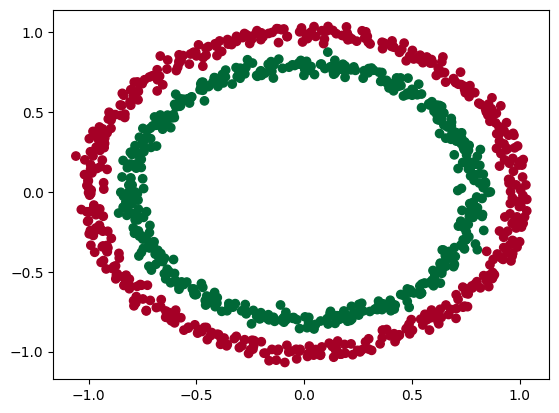

In [176]:
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0], y = X[:,1], c=Y ,cmap=plt.cm.RdYlGn)

In [177]:
import torch
torch.__version__

'2.2.2+cu121'

In [178]:
# Data to Tensors
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)


In [179]:
X[:3], Y[:3]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733]]),
 tensor([1., 1., 1.]))

In [180]:
type(X), X.shape, X.dim

(torch.Tensor, torch.Size([1000, 2]), <function Tensor.dim>)

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
type(X_test)

torch.Tensor

In [182]:
len(X_train), len(X_test),len(Y_train), len(Y_test)

(800, 200, 800, 200)

In [183]:
from torch import nn
if torch.cuda.is_available():
    print("CUDA is available.")
else:
    print("CUDA is not available.")

CUDA is available.


In [184]:
class CircleModel0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=20)
        self.layer2 = nn.Linear(in_features=20, out_features=1)

    def forward(self, x):
        return self.layer2(self.layer1(x))

model0  = CircleModel0().to("cuda")

In [185]:
next(model0.parameters()).device

device(type='cuda', index=0)

In [186]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230]], device='cuda:0')),
             ('layer1.bias',
              tensor([ 0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4

In [187]:
X_test = X_test.to("cuda")
untrained_preds = model0(X_test)
print(f"Length of predection: {len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"\nFirst 10 predections:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{Y_test[:10]}")


Length of predection: 200, Shape:torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])

First 10 predections:
tensor([[-0.3537],
        [-0.4253],
        [-0.4091],
        [-0.3369],
        [-0.7951],
        [-0.8358],
        [-0.7315],
        [-0.8286],
        [-0.3928],
        [-0.4343]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


                                         <---------------------------------------------------------------------------->                                                                 
For regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how wrong your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

                                         <---------------------------------------------------------------------------->                                                                

In [188]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),lr=0.1)


In [189]:
def accuracy_fn(y_true, y_preds):
    correct = torch.eq(y_true, y_preds).sum().item()
    acc = (correct/len(y_preds)) *1000
    return acc

<h3>PyTorch training loop</h3>
1. Forward Pass <br>
2. Caluate loss <br>
3. Zero Gradients <br>
4. Preform Backprop on loasss <br>
5. step the optimizer(gradient descent) <br>

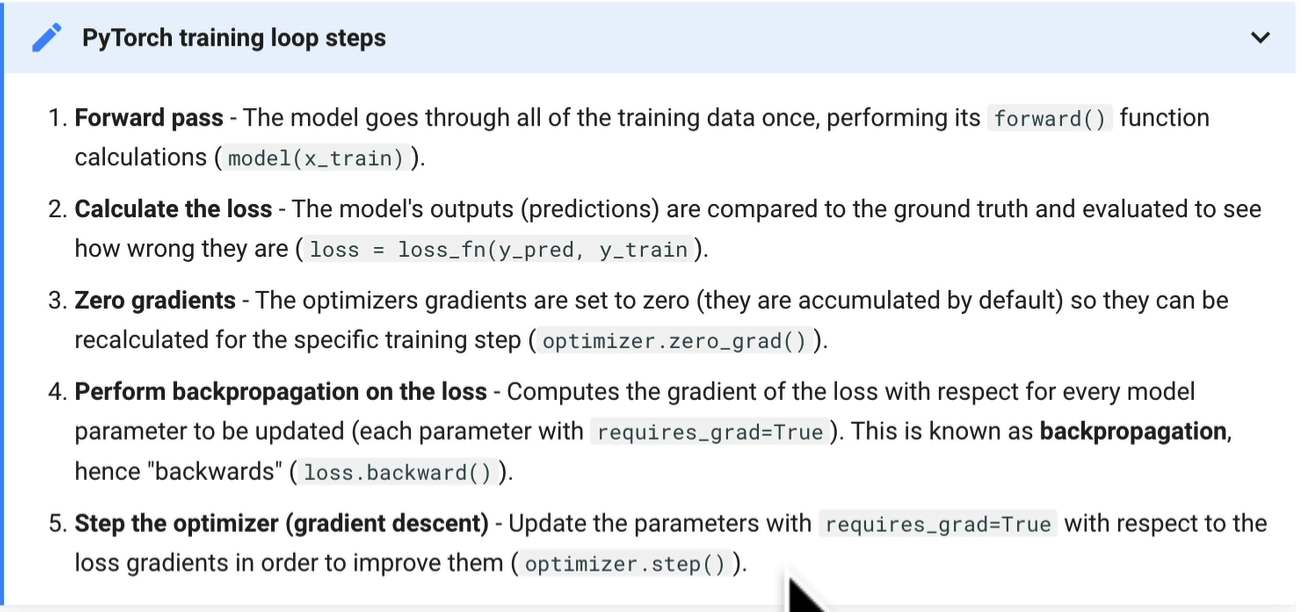

In [190]:
# Checking model with out training for this using model.eval and inference mode to avoid training

model0.eval()
with torch.inference_mode():
    y_logits = model0(X_test)[:5]
y_logits    

tensor([[-0.3537],
        [-0.4253],
        [-0.4091],
        [-0.3369],
        [-0.7951]], device='cuda:0')

In [191]:
# using sigmoid with on logits
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.4125],
        [0.3953],
        [0.3991],
        [0.4166],
        [0.3111]], device='cuda:0')

In [192]:
# Just to show concept sigmoid activation functuion trains model
torch.round(y_preds_probs), Y_test[:5]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

<h3>Building Training Loop</h3>

In [193]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, Y_train = X_train.to("cuda"), Y_train.to("cuda")
X_test, Y_test = X_test.to("cuda"), Y_test.to("cuda")

for epoch in range(epochs):
    #Trining
    model0.train()

    #Forward pass
    y_logits = model0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    #Calculate loss
    loss = loss_fn(y_logits, Y_train)

    acc = accuracy_fn(y_true = Y_train, y_preds = y_pred)

    #Optimizer
    optimizer.zero_grad()

    #Loss backward
    loss.backward()

    #optimizer step (gradient descent)
    optimizer.step()

    model0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate loss
        test_loss = loss_fn(Y_test, test_pred)

        test_acc = accuracy_fn(y_true= Y_test, y_preds= test_pred)

    #print test
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}% ")


Epoch: 0 | Loss: 0.73795, Acc: 500.00% | Test loss: 1.00320 | Test acc: 500.00% 
Epoch: 10 | Loss: 0.69692, Acc: 498.75% | Test loss: 1.00320 | Test acc: 475.00% 
Epoch: 20 | Loss: 0.69340, Acc: 485.00% | Test loss: 0.80320 | Test acc: 485.00% 
Epoch: 30 | Loss: 0.69306, Acc: 502.50% | Test loss: 0.76320 | Test acc: 460.00% 
Epoch: 40 | Loss: 0.69301, Acc: 506.25% | Test loss: 0.74820 | Test acc: 465.00% 
Epoch: 50 | Loss: 0.69299, Acc: 508.75% | Test loss: 0.73820 | Test acc: 465.00% 
Epoch: 60 | Loss: 0.69299, Acc: 515.00% | Test loss: 0.73820 | Test acc: 475.00% 
Epoch: 70 | Loss: 0.69298, Acc: 507.50% | Test loss: 0.74320 | Test acc: 470.00% 
Epoch: 80 | Loss: 0.69298, Acc: 508.75% | Test loss: 0.74820 | Test acc: 465.00% 
Epoch: 90 | Loss: 0.69298, Acc: 512.50% | Test loss: 0.75820 | Test acc: 460.00% 


In [194]:
import HelperFunctions
from HelperFunctions import plot_predictions, plot_decision_boundary


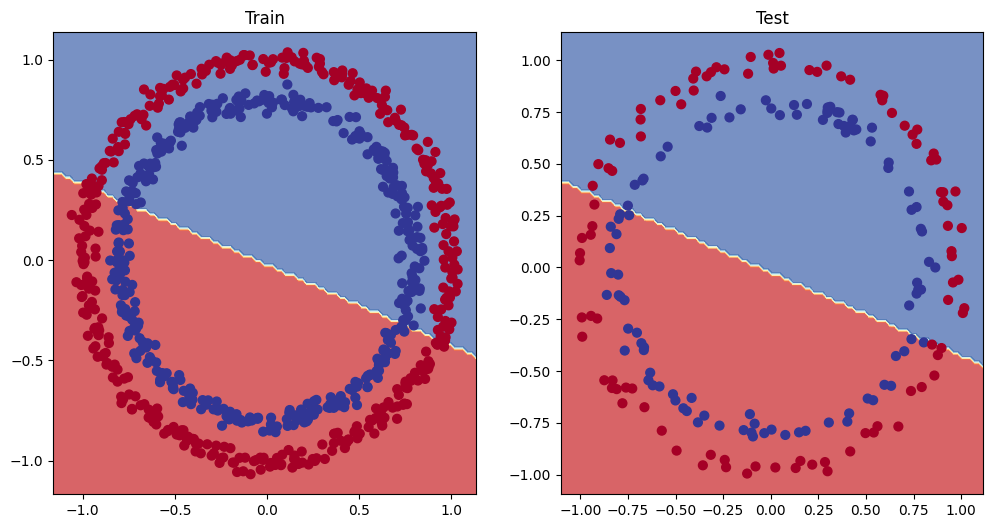

In [195]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model0, X_train, Y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model0, X_test, Y_test)

                                                                                                                                                                                                                                    
<h1 style="text-align: center;"><u><b>Building Non Linear Model</b></u></h1>
                                                                                                                                                                                                                                    

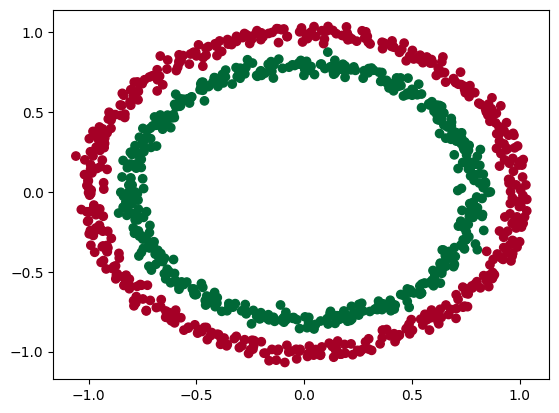

In [196]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, Y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlGn)

In [197]:
import torch
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [199]:
X_train, Y_train = X_train.to("cuda"), Y_train.to("cuda")
X_test, Y_test = X_test.to("cuda"), Y_test.to("cuda")

In [200]:
from torch import nn

class CircleModelClassV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.Layer1 = nn.Linear(in_features=2, out_features=10)
        self.Layer2 = nn.Linear(in_features=10, out_features=10)
        self.Layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, X):
        return self.Layer3(self.relu(self.Layer2(self.Layer1(X))))
        

In [201]:
model_V2 = CircleModelClassV2().to("cuda")
model_V2

CircleModelClassV2(
  (Layer1): Linear(in_features=2, out_features=10, bias=True)
  (Layer2): Linear(in_features=10, out_features=10, bias=True)
  (Layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [202]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_V2.parameters(), lr = 0.1)

In [204]:
# Random seeds 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    #Training
    model_V2.train()

    #ForwardPass
    y_logits = model_V2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    #Calculate loss
    loss = loss_fn(y_logits, Y_train)
    acc = accuracy_fn(y_true=Y_train, y_preds=y_pred)

    # Optimizer Zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    #Step optimizer
    optimizer.step()

     ### Testing
    model_V2.eval()

    with torch.inference_mode():
        test_logits = model_V2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
    
        test_loss = loss_fn(test_logits, Y_test)
        test_acc = accuracy_fn(y_true=Y_test, y_preds=test_pred)
  
     # Result
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6981, Acc: 497.50% | Test Loss: 0.6985, Test Acc: 495.00%
Epoch: 100 | Loss: 0.6928, Acc: 508.75% | Test Loss: 0.6941, Test Acc: 475.00%
Epoch: 200 | Loss: 0.6901, Acc: 535.00% | Test Loss: 0.6914, Test Acc: 500.00%
Epoch: 300 | Loss: 0.6876, Acc: 567.50% | Test Loss: 0.6882, Test Acc: 550.00%
Epoch: 400 | Loss: 0.6847, Acc: 598.75% | Test Loss: 0.6846, Test Acc: 610.00%
Epoch: 500 | Loss: 0.6798, Acc: 558.75% | Test Loss: 0.6788, Test Acc: 605.00%
Epoch: 600 | Loss: 0.6727, Acc: 560.00% | Test Loss: 0.6717, Test Acc: 605.00%
Epoch: 700 | Loss: 0.6629, Acc: 647.50% | Test Loss: 0.6644, Test Acc: 650.00%
Epoch: 800 | Loss: 0.6469, Acc: 741.25% | Test Loss: 0.6528, Test Acc: 715.00%
Epoch: 900 | Loss: 0.6215, Acc: 818.75% | Test Loss: 0.6321, Test Acc: 780.00%


In [206]:
model_V2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_V2(X_test))).squeeze()

y_preds[:10], Y_test[:10]

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

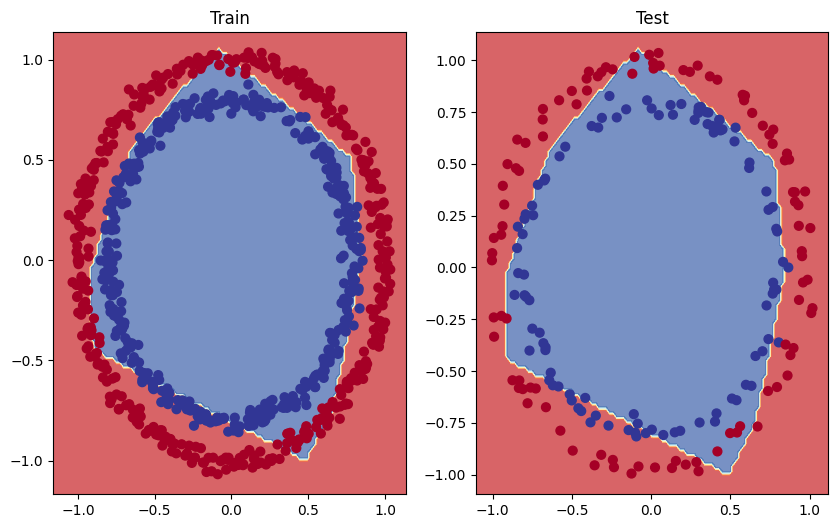

In [208]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_V2, X_train, Y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_V2, X_test, Y_test)

